In [4]:
# Import necessary libraries

import numpy as np
import pandas as pd

import pandas_profiling as pp

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

import warnings # to avoid warnings
warnings.filterwarnings('ignore')

C:\Users\15512\AppData\Local\Temp\ipykernel_17636\2515001025.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [11]:
df=pd.read_csv(r'C:\Users\15512\Desktop\Projects\Marketing Analytics\dataset.csv',low_memory=False)


In [12]:
df.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,837,8,SGD,SGD,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2634,44,SGD,SGD,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2135,32,SGD,SGD,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,NaN,0.0,652.173913,2327,48,SGD,SGD,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,1538,20,SGD,SGD,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [13]:
df.shape 

(72612, 35)

In [14]:
df.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

<ul><li>unique_reach , total_reach : ads were paused , the campaign was targeting the botton of the funnel i.e conversions and not focusing on awareness and consideration</li>
<li>position_in_content : the field is set to automatic placement</li>
<li>max_bid_cpm : automatic bidding technique used hence left blank , optimization is based on other goal types such as cpc , cpa</li></ul>

In [17]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.000000,float64
total_reach,72612,100.000000,float64
position_in_content,72612,100.000000,float64
max_bid_cpm,65206,89.800584,float64
creative_width,3412,4.698948,float64
creative_height,3412,4.698948,float64
template_id,3412,4.698948,float64
approved_budget,406,0.559136,float64
exchange_rate,0,0.000000,int64
clicks,0,0.000000,int64


<ul><li>creatives height , width : maybe such campaigns are video or search campaigns ? left blank in the platform , not filled.</li>
<li>template id : template provided not used , search campaigns</li>
<li>approved_budget : proposed budget not approved by the client , budget changing at daily level , monthly or lifetime frequently hence not in sync</li></ul>

In [19]:
# creative width
df['creative_width'] = df['creative_width'].fillna(0) 

# creative height
df['creative_height'] = df['creative_height'].fillna(0)

# template id
df['template_id'] = df['template_id'].fillna(-1)

# approved_budget
df['approved_budget'] = df['approved_budget'].fillna(0)

# Drop unnecessary columns

<li>Retaining only usefull columns that will have large impact on analysis</li>
<li>Removing columns having null or nan values greater than 80% of the total records.</li>

<li>no_of_days : most of the campaigns run for atleast a month , minimum no_of_days is 0 which can signify that the snapshot was taken that day only , std deviation is 25 so theremaybe having length of 2-3 days which can signify exhibition campaigns or instore sales campaigns were also running.</li>


In [25]:
df.describe()


,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,7.261200e+04,72612.000000,7406.0,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0
mean,3130.143282,27.036344,49.449127,7450.124842,255.226409,212.688674,79.131659,6195.862213,345.272861,1.251030e+05,21.847780,1.0,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN
std,142.154918,25.479175,55.881324,4062.384982,106.899767,89.083139,27.033401,387.864576,23.707191,5.611237e+05,23.759286,0.0,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,-1.000000,4756.000000,188.000000,0.000000e+00,1.000000,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,1.0,0.0,377.656676,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,1.0,0.0,755.313351,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,1.0,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN


<li>ext_service_name : most of the ads were running from Facebook Ads platform maybe because the ads that were running were of social channel i.e ads running on social media platforms and Facebook Ads is mainly preferred for that.</li>
<li>landing_page : boho jewelry page is the most visited page , we can check if the conversions are also high if they arent then we can check who was the audience that we were targeting and change our demographic and geographic options accordingly.</li>

In [26]:
# summary of categorical variables
df.describe(include=object)


,time,ext_service_name,search_tags,landing_page,advertiser_name,advertiser_currency,channel_name,stats_currency,currency_code,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
count,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612
unique,224,3,6,45,44,5,5,5,5,5,5,7,2,118
top,2022-10-22,Facebook Ads,#The Ultimate Fashion Statement with X,https://www.abcjewelry.com/collections/boho-je...,Oman,AED,Mobile,AED,AED,Others,AED,Asia/Kolkata,week_day,beaded jewelry
freq,955,24275,12293,1684,8641,53661,14625,53661,53661,49008,53661,64264,62424,674


In [27]:
df['ctr']=(df['clicks']/df['impressions'])*100

<li>The Benchmark of average CTR ( Click through rate ) is 0.76% for the Style & Fashion Industry given by Google and 2.71% to be in Top 10% competition. Since we can see from the CTR distribution that most of the ctr lies between 0.76-2.71 for ABC company , so if the CTR is good then why are conversions low for product X ? - Thats what we need to find out !</li>

<li>DID YOU NOTICE ? : If impressions ==10 , clicks ==10 , then also CTR==1% if impressions==1000 , clicks ==1000 then also CTR==1% , clicks==5 , impressions==800 then CTR = 0.833% 😧</li>

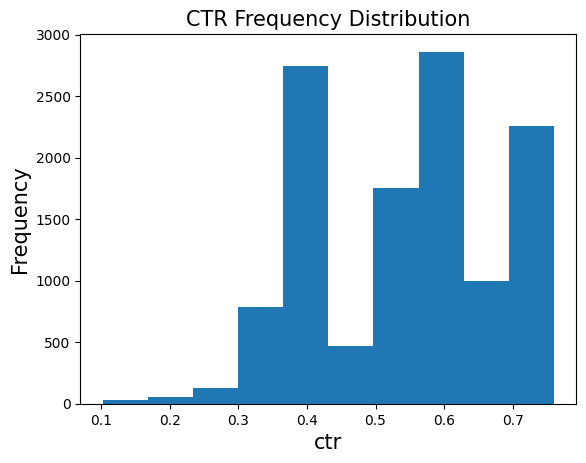

In [28]:
# ctr Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("ctr", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("CTR Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df.loc[(df["ctr"]>=0.1) & (df["ctr"]<=0.76)]['ctr'])
plt.show()


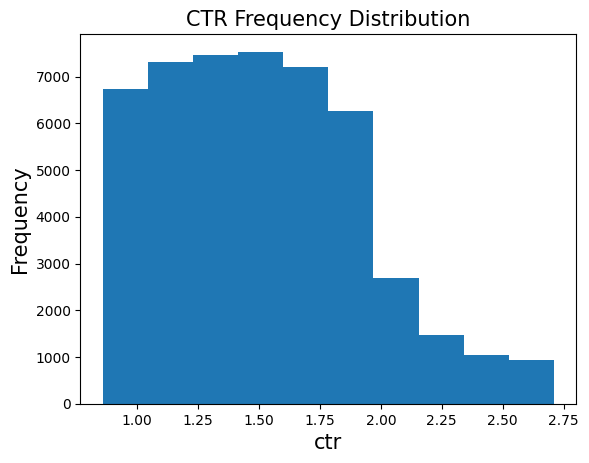

In [29]:
# ctr Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("ctr", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("CTR Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df.loc[(df["ctr"]>0.86) & (df["ctr"]<=2.71)]['ctr'])
plt.show()


<li>We can see as the number of days increases the number of impressions and clicks decreases which implies that for long campaigns optimization based on performance metric i.e CTR is needed otherwise the budget will be exhausted but performance will remain poor.</li>

<li>We can check spent vs days to know how the budget is pacing and further verify different scenarios like : whether the campaign is over spending while giving good performance , are there any campaigns which arent able to exhaust their budget as well as giving bad performance , whether there are campaigns which are having good performance but unable to spend their budget.</li>

<li>We can also see that for campaigns having longer duration the performance is sort of constant & gathered low impressions as well as clicks which can put emphasis on the fact that the awareness for the product X isnt much among the audience and hence the top of the marketing funnel shall be focused too.</li>

<li>The graphs below can also signify that most of the campaigns having less duration were newly created or were paused in between due to poor performance , so calculating remanining number of days , budget left and current + required performance is necessary.</li>

<li>We can also spot outliers in both the graphs which indicates sudden spikes in the impressions and clicks which maybe due to certain events such as festivals , social media popularity , etc . We can further analyse at what time of the day , on which days , in which season , festivals , national or public holidays the performance usually goes up.</li>

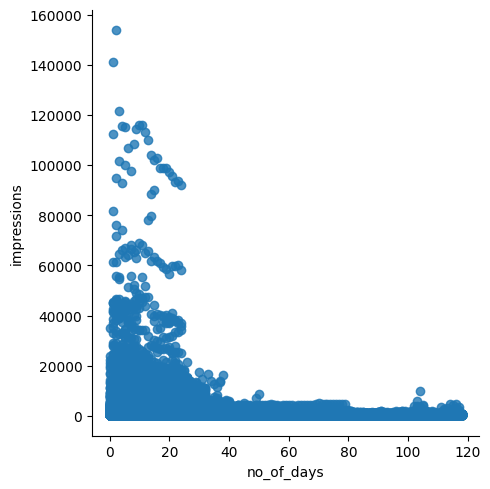

In [30]:
# scatter plot : no_of_days vs impressions
sns.lmplot(data=df, x="no_of_days", y="impressions")

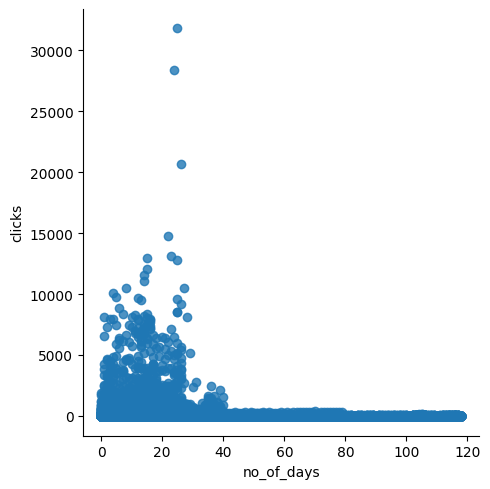

In [31]:
# scatter plot : no_of_days vs clicks
sns.lmplot(data=df, x="no_of_days", y="clicks")

<li>Mobile campaigns are able to get higher clicks ,hence if some campaign is under performing for a quite few days and needs to be paused then we can shift its budget and give it to mobile campaigns.</li>
<li>The performance of search campaigns needs to be improved , since we see that the impressions and clicks gained by these campaigns relatively lower . We shall focus on using good keywords , search tags and Call to Actions to improve performance of search campaigns.</li>
<li>Social campaigns are able to reach audiences more but unable to get conversions , so we can focus on enhanching our creatives more.</li>

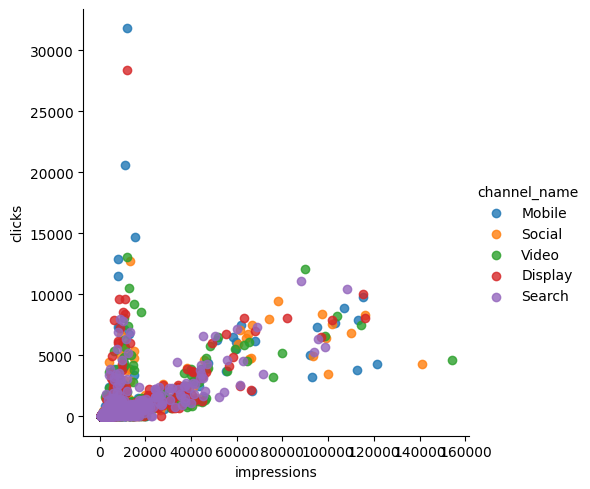

In [32]:
# scatter plot : impressions vs clicks ( hue : channel_name )
sns.lmplot(x = "impressions", y = "clicks", data = df, fit_reg=False, hue='channel_name')

<li>Top 3 countries where the campaigns are running are Oman , Qatar & UAE which means the company mainly operates in the Middle East region hence while optimizating the campaigns in these countries we must narrow down our targeting options , use arabic words in ads , creatives and also in search tags , focus on major festivals or celebrations like Ramdan , etc.</li>
<li>We can further find out performance metrics of each country vs budget they were alloted to gauge the relative performance and take more informed decision.</li>

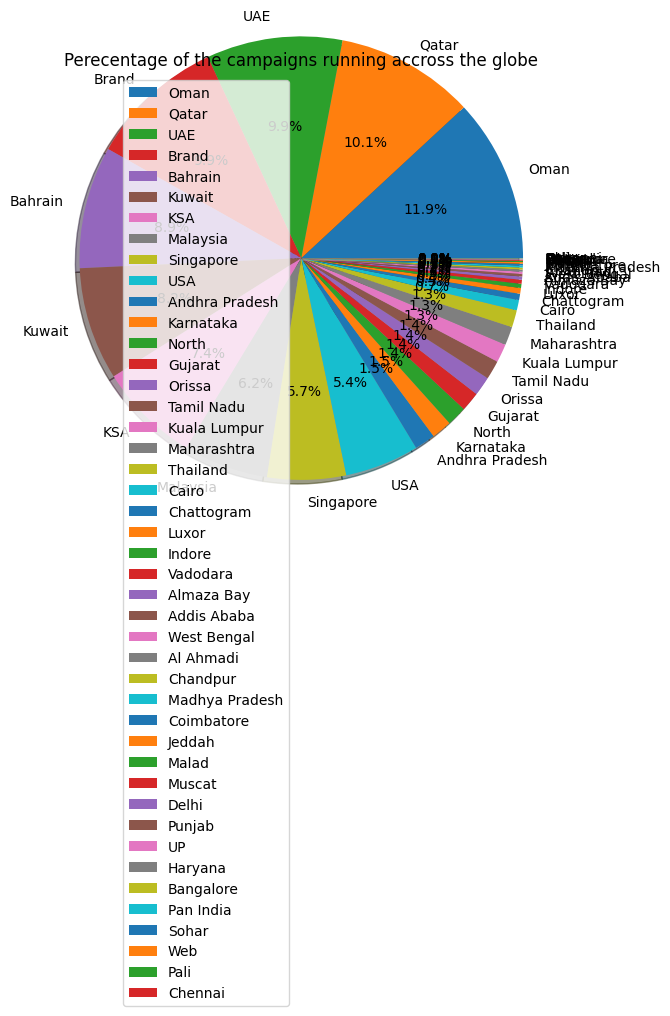

In [33]:
figsize = ()
label = df['advertiser_name'].value_counts().index
name = df['advertiser_name'].value_counts()
plt.pie(name,labels = label,shadow = True,autopct='%1.1f%%',radius = 1.5)
plt.title('Perecentage of the campaigns running accross the globe')
plt.legend()
plt.show()
     

The heatmap below shows the highest correlation between media_cost_usd and impressions of 0.93 and 0.61 between media_cost_usd and clicks which doesnt actually suggests that for better performance we must keep on increasing our spent . We msut be very carefull while assessing correlations between different variables based on the heatmap.

In [34]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,ctr
campaign_item_id,1.000000,-0.627128,0.004442,0.629882,0.720578,0.720578,0.634469,0.785481,0.812171,-0.055684,-0.000412,NaN,NaN,-0.043859,-0.033682,-0.032596,NaN,-0.036411,NaN,NaN,NaN,-0.043566
no_of_days,-0.627128,1.000000,-0.006645,-0.412571,-0.551147,-0.551147,-0.464918,-0.633059,-0.642509,-0.115369,-0.003310,NaN,NaN,-0.004802,-0.113251,-0.059006,NaN,-0.090268,NaN,NaN,NaN,-0.071231
ext_service_id,0.004442,-0.006645,1.000000,0.001587,0.002927,0.002927,0.002321,0.002029,0.002778,-0.001092,-0.001832,NaN,NaN,-0.000248,0.002039,0.002225,NaN,0.003464,NaN,NaN,NaN,0.002383
creative_id,0.629882,-0.412571,0.001587,1.000000,0.197148,0.197148,0.101059,0.499234,0.474506,-0.027800,-0.000577,NaN,NaN,0.030049,0.032815,0.044518,NaN,0.040575,NaN,NaN,NaN,0.032717
creative_width,0.720578,-0.551147,0.002927,0.197148,1.000000,1.000000,0.986752,0.740611,0.716923,-0.080317,0.003838,NaN,NaN,-0.150596,-0.116527,-0.103797,NaN,-0.124898,NaN,NaN,NaN,-0.121192
creative_height,0.720578,-0.551147,0.002927,0.197148,1.000000,1.000000,0.986752,0.740611,0.716923,-0.080317,0.003838,NaN,NaN,-0.150596,-0.116527,-0.103797,NaN,-0.124898,NaN,NaN,NaN,-0.121192
template_id,0.634469,-0.464918,0.002321,0.101059,0.986752,0.986752,1.000000,0.659412,0.624832,-0.108815,0.004375,NaN,NaN,-0.188118,-0.155780,-0.134447,NaN,-0.161298,NaN,NaN,NaN,-0.153461
advertiser_id,0.785481,-0.633059,0.002029,0.499234,0.740611,0.740611,0.659412,1.000000,0.815637,0.005148,0.002286,NaN,NaN,-0.050438,-0.012835,-0.025677,NaN,-0.031488,NaN,NaN,NaN,-0.047078
network_id,0.812171,-0.642509,0.002778,0.474506,0.716923,0.716923,0.624832,0.815637,1.000000,0.041281,-0.000650,NaN,NaN,0.018607,0.049847,0.031333,NaN,0.030625,NaN,NaN,NaN,0.024005
approved_budget,-0.055684,-0.115369,-0.001092,-0.027800,-0.080317,-0.080317,-0.108815,0.005148,0.041281,1.000000,0.000686,NaN,NaN,0.092939,0.200683,0.110463,NaN,0.149966,NaN,NaN,NaN,0.172573


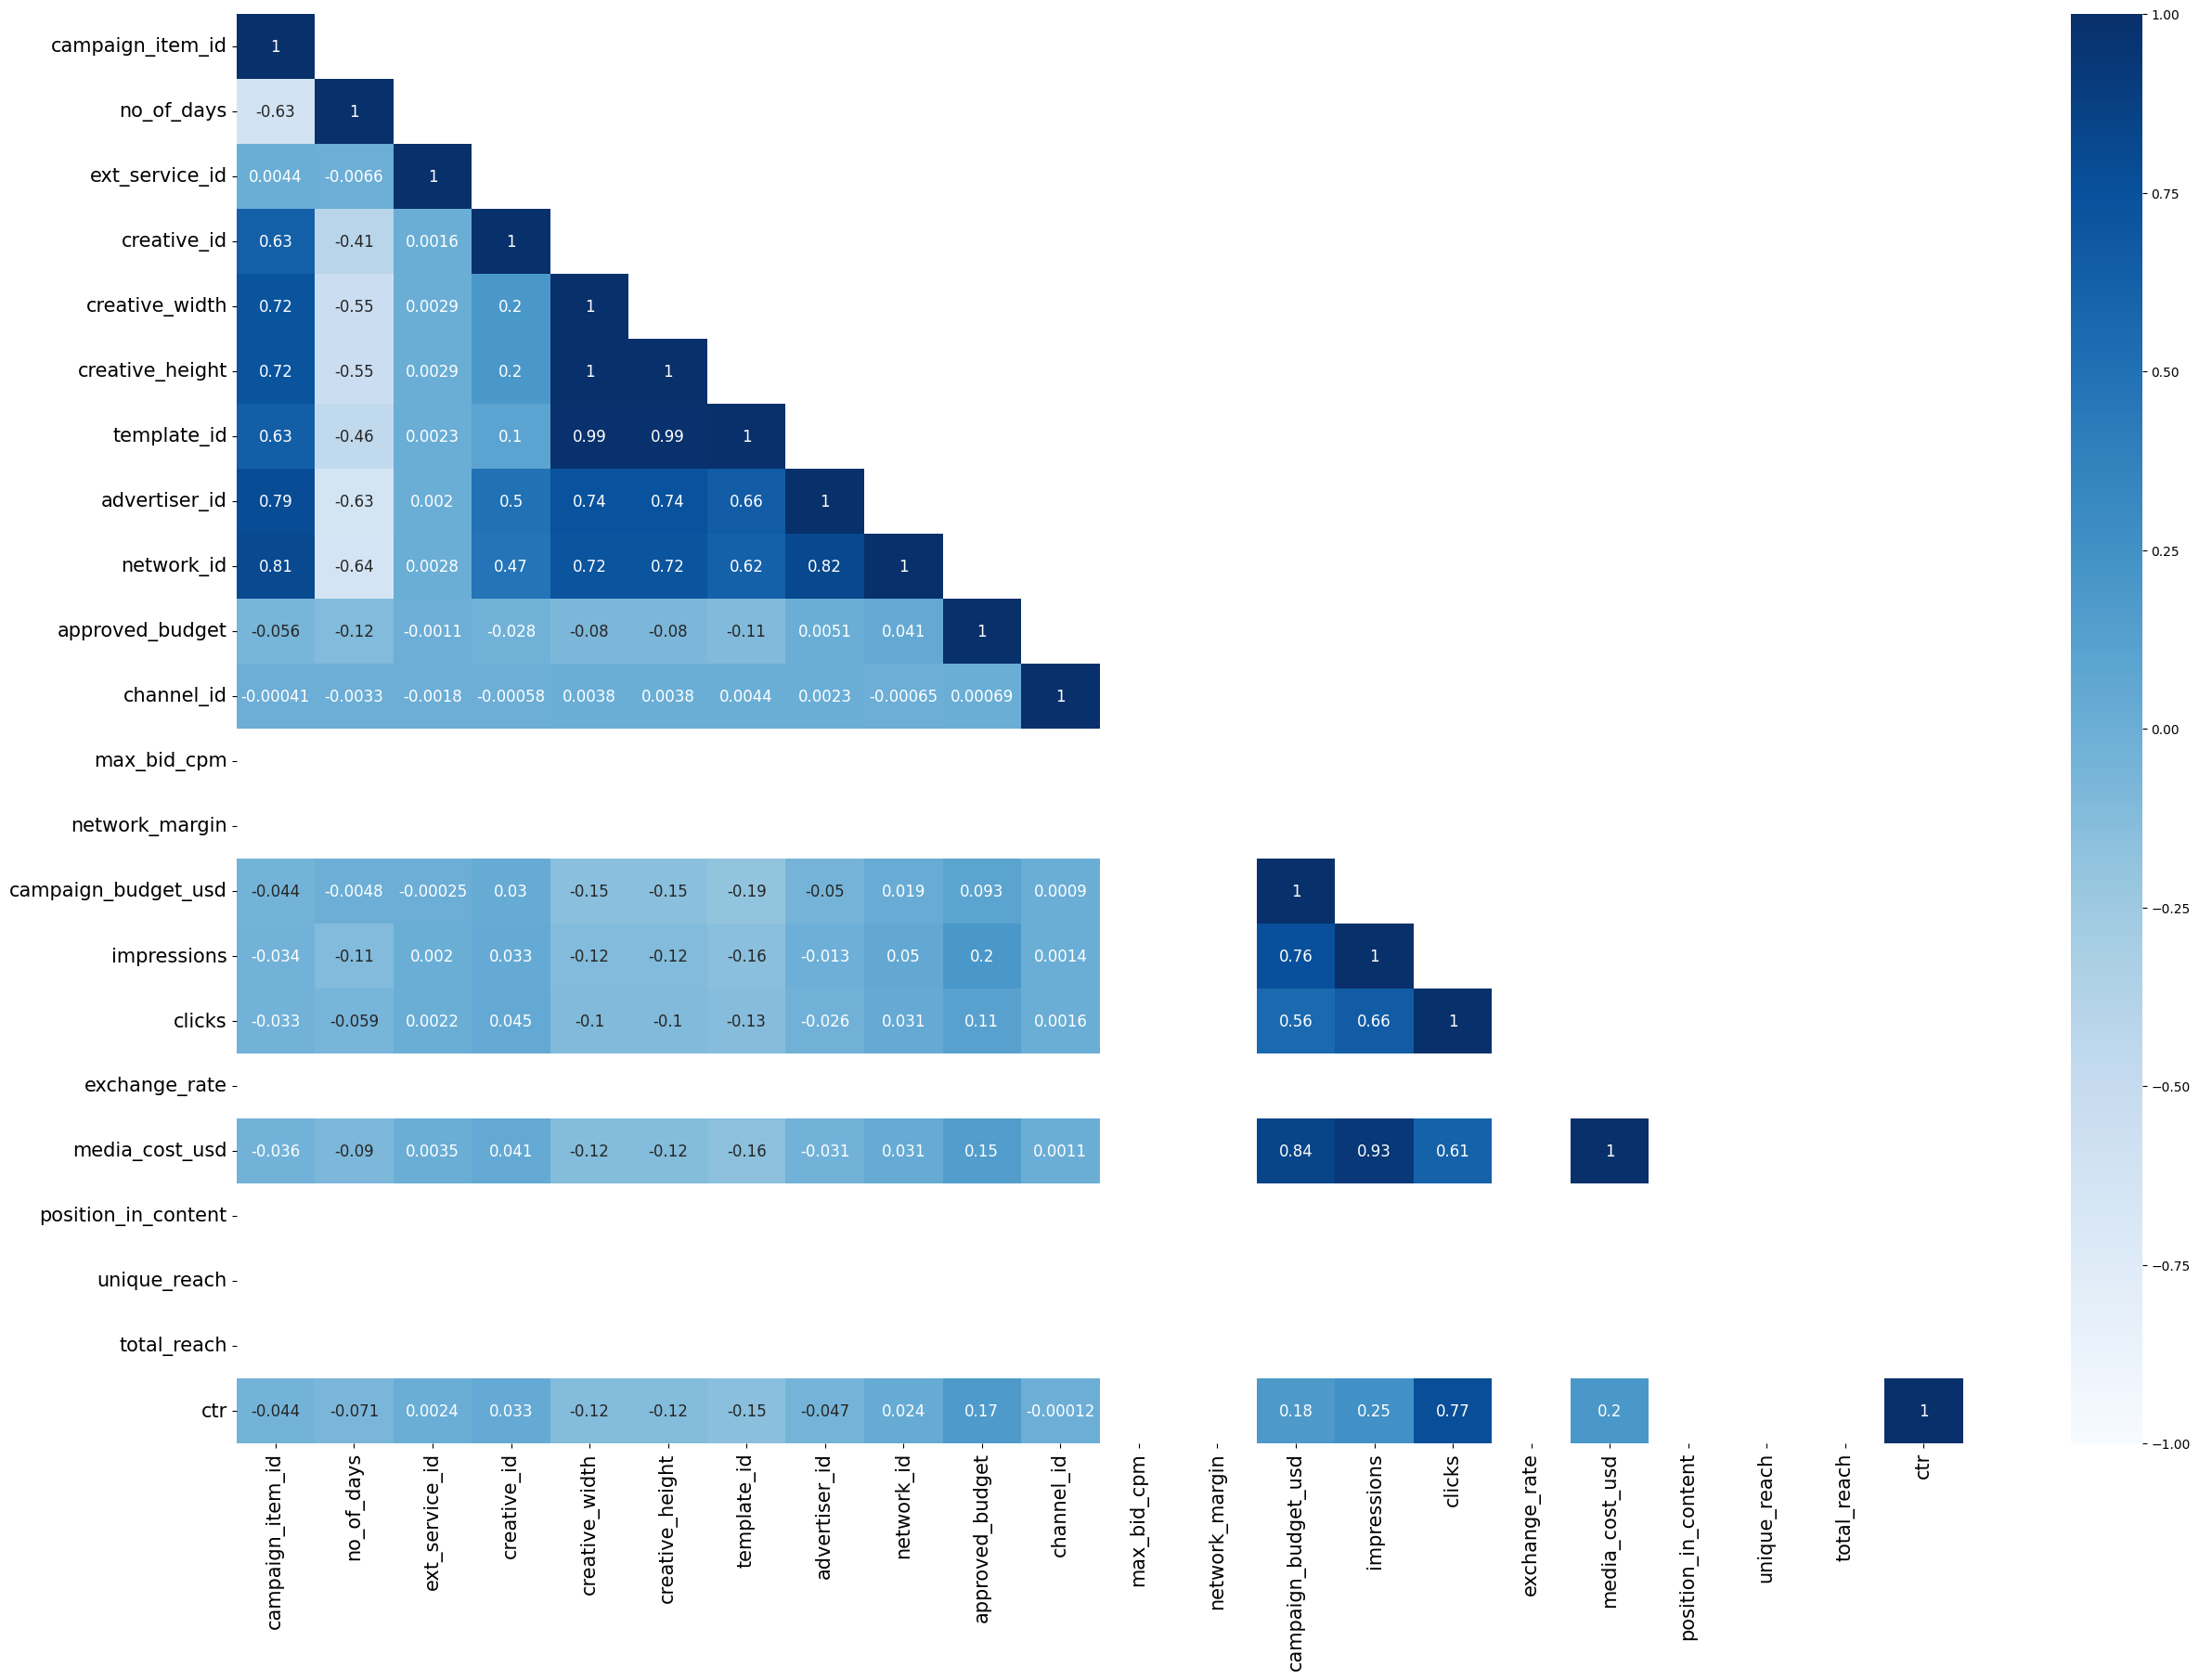

In [35]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

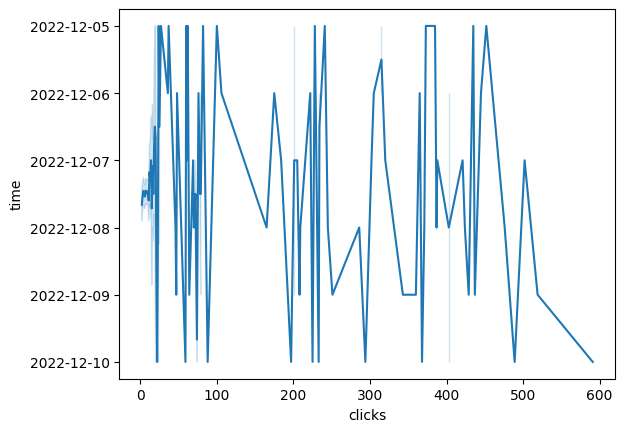

In [36]:
# draw lineplot
sns.lineplot(x="clicks", y="time", data=df.loc[ (df['time']>='2022-12-05') & (df['time']<='2022-12-10') ] )
plt.show()


In [37]:
def simple_linear_regression(dataset,X,Y):

  # here the dataset parameter can be train dataset or test dataset 
  # X, Y are the attributes of the dataset that are to be used for simple linear regression

  # Values method : Only the values in the DataFrame will be returned, the axes labels will be removed.
  X_values = dataset[X].values 
  Y_values = dataset[Y].values

  # calculating mean for X , Y attributes
  x_mean = np.mean(X_values)
  y_mean = np.mean(Y_values)

  # total values 
  n=len(X_values)

  # caluculating w1 
  numerator = 0
  denominator = 0

  for i in range(n):

    numerator += (X_values[i] - x_mean)* (Y_values[i] - y_mean)
    denominator += (X_values[i] - x_mean) **2 

  w1 = numerator / denominator

  # calculating w0
  w0 = y_mean - (w1 * x_mean)

  # predicted response 
  Y_predicted = w0 + w1*X_values

  ans=[X_values, Y_values, Y_predicted, w0, w1]

  return ans

In [38]:
# splitting dataset into 70:30 ratio

# Defining train size
train_size = int(0.7 * len(df))

# Splitting dataset
train_set = df[:train_size]
test_set = df[train_size:]

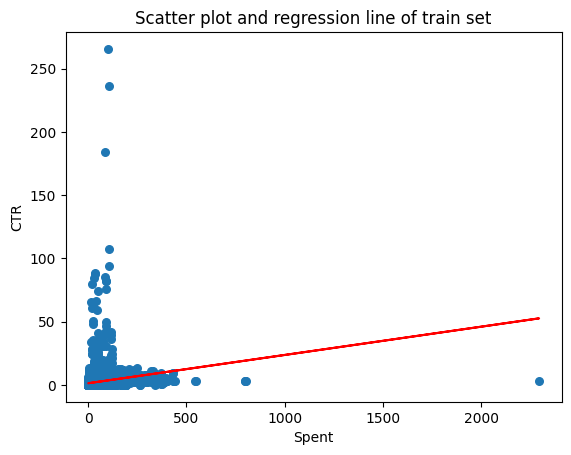

In [39]:
ans_train = simple_linear_regression(train_set,'media_cost_usd','ctr')

plt.scatter(ans_train[0],ans_train[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_train[0],ans_train[2],color="red")

plt.title('Scatter plot and regression line of train set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()


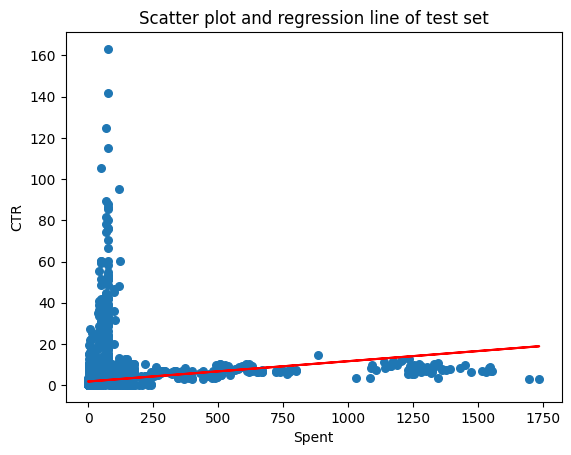

In [40]:
ans_test = simple_linear_regression(test_set,'media_cost_usd','ctr')

plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_test[0],ans_test[2],color="red")

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()

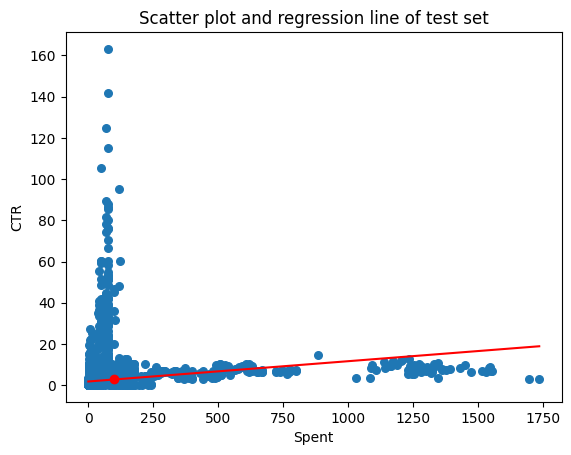

In [45]:
x = np.linspace(np.max(ans_test[0]),np.min(ans_test[0]),100) # Linspace :  is used to create an evenly spaced sequence in a specified interval.
y = ans_test[3] + ans_test[4]*x # predicting responses 

# predicting CTR
x1=100
y1=ans_test[3]+ans_test[4]*x1
plt.plot(x1,y1,'ro') # plotting that single point

# plotting the regression line
plt.plot(x,y,color="red")

# scatter plot
plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()

<li>MSE calculates the average squared difference between the predicted values and the actual values of the target variable in the test set.</li>
<li>A MSE score of 14 means that on average, the model's predictions are off by the square root of 14 (which is approximately 3.7 units) compared to the actual values.</li>
<li>MAE calculates the average absolute difference between the predicted values and the actual values of the target variable in the test set.</li>
<li>For example, if the MAE score is 1, it means that on average, the model's predictions are off by 1 unit compared to the actual values.</li>
<li>MSE AND MAE values ideally must be lower.</li>

In [43]:
# mean absolute error
def MAE():
  mae_sum = 0
  for y_,x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mae_sum += abs(y_ - prediction)
  mae = mae_sum / len(ans_test[1])

  return mae

# mean squared error
def MSE():
  mse_sum = 0
  for y_, x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mse_sum += (y_ - prediction)**2
  mse = mse_sum / len(ans_test[1])

  return mse

# root mean squared error
def RMSE():
  return MSE()**0.5

In [44]:
print("Mean absolute error : ",MAE())
print("Mean squarred error : ",MSE())
print("Root mean squared error : ",RMSE())

Mean absolute error :  1.0492220543221997
Mean squarred error :  14.359562930764161
Root mean squared error :  3.7894013947804686
